In [76]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats
from matplotlib.font_manager import FontManager

In [77]:
spaceMono_bold = 'https://github.com/googlefonts/spacemono/blob/main/fonts/SpaceMono-BoldItalic.ttf?raw=true'
monoBFont = FontManager(spaceMono_bold)

In [50]:
sns.set()
sns.set_style("darkgrid", {'grid.linestyle': '--'})
# sns.set_context("paper", 1.5, {"lines.linewidth": 4})
sns.set_palette("coolwarm", 8, 1)
# sns.set('talk', 'whitegrid', 'dark', font_scale=1.5,
#         rc={"lines.linewidth": 2, 'grid.linestyle': '--'})

In [51]:
def simple_func(x):
    return x ** 2

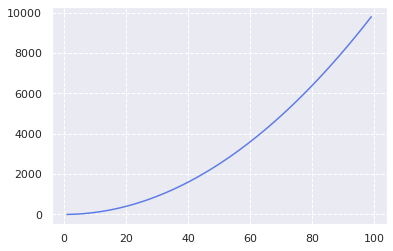

In [52]:
x = np.arange(1,100)
y = simple_func(x)
plt.plot(x,y)

In [8]:
df = pd.read_csv("/work/assets/fbref/leagueStats/liga/2122/standard.csv")
df.head()

,Unnamed: 0,Player,Nation,Pos,Squad,Age,Born,MP_Playing Time,Starts_Playing Time,Min_Playing Time,...,G+A-PK_Per 90 Minutes,xG_Expected,npxG_Expected,xA_Expected,npxG+xA_Expected,xG_Per 90 Minutes,xA_Per 90 Minutes,xG+xA_Per 90 Minutes,npxG_Per 90 Minutes,npxG+xA_Per 90 Minutes
0,0,Luis Abram,pe PER,DF,Granada,26-068,1996.0,8,6,560,...,0.00,0.5,0.5,0.0,0.5,0.08,0.00,0.08,0.08,0.08
1,1,Marcos Acuña,ar ARG,DF,Sevilla,30-190,1991.0,27,22,1900,...,0.19,1.3,1.3,2.8,4.1,0.06,0.13,0.19,0.06,0.19
2,2,Martin Agirregabiria,es ESP,DF,Alavés,25-361,1996.0,21,16,1501,...,0.06,0.1,0.1,0.9,1.0,0.01,0.05,0.06,0.01,0.06
3,3,Julen Agirrezabala,es ESP,GK,Athletic Club,21-131,2000.0,4,4,360,...,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00
4,4,Sergio Agüero,ar ARG,FW,Barcelona,33-338,1988.0,4,2,151,...,0.60,1.1,1.1,0.3,1.3,0.64,0.16,0.80,0.64,0.80


In [55]:
df_squad = df.groupby(by="Squad", as_index=False).sum()
df_squad.sort_values(by="xG_Expected", ascending=False, inplace=True)
df_squad

,Squad,Unnamed: 0,Born,MP_Playing Time,Starts_Playing Time,Min_Playing Time,90s_Playing Time,Gls_Performance,Ast_Performance,G-PK_Performance,...,G+A-PK_Per 90 Minutes,xG_Expected,npxG_Expected,xA_Expected,npxG+xA_Expected,xG_Per 90 Minutes,xA_Per 90 Minutes,xG+xA_Per 90 Minutes,npxG_Per 90 Minutes,npxG+xA_Per 90 Minutes
15,Real Madrid,7356,57848.0,515,370,33404,371.1,73,52,65,...,7.89,66.9,57.8,44.5,102.5,6.37,5.55,11.91,6.02,11.56
3,Barcelona,8650,71863.0,513,371,33335,370.1,63,48,57,...,11.63,59.7,54.4,42.3,96.6,6.86,4.28,11.15,6.45,10.74
19,Villarreal,6925,55830.0,530,374,33562,372.9,53,44,48,...,6.18,59.3,54.7,43.2,97.5,5.02,3.72,8.76,4.73,8.48
4,Betis,8280,59809.0,516,374,33503,372.2,55,39,49,...,6.06,50.8,46.2,33.9,80.3,3.49,2.68,6.18,3.20,5.89
11,Levante,8845,57808.0,534,374,33624,373.5,42,28,35,...,4.42,49.7,40.5,26.1,66.6,3.52,2.16,5.73,3.07,5.28
1,Athletic Club,8902,49883.0,534,374,33632,373.7,38,32,35,...,3.95,46.9,41.3,32.9,73.8,3.39,1.67,5.07,3.14,4.79
16,Real Sociedad,11380,63887.0,537,374,33556,373.1,33,19,26,...,3.06,45.2,38.2,26.8,64.9,3.91,2.55,6.49,3.56,6.14
2,Atlético Madrid,7600,47870.0,505,356,32113,356.7,54,38,51,...,6.02,43.3,40.2,30.0,70.3,2.82,1.80,4.65,2.68,4.51
17,Sevilla,8599,61829.0,517,368,33047,367.4,48,38,46,...,6.00,39.0,36.5,28.3,65.0,7.62,6.90,14.56,7.47,14.42
14,Rayo Vallecano,7699,51840.0,523,373,33344,370.5,34,27,31,...,3.67,38.4,36.1,26.9,63.3,2.88,2.15,5.06,2.77,4.96


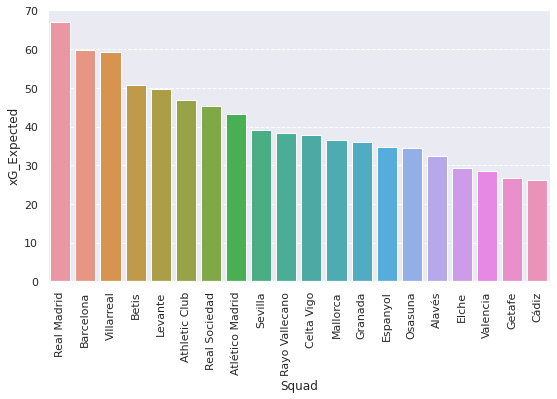

In [82]:
fig, ax = plt.subplots(figsize=(9,5))
chart = sns.barplot(x="Squad", y="xG_Expected", data=df_squad, ax=ax)
plt.xticks(rotation=90);

In [86]:
df_squad.describe()["xG_Expected"]["mean"]

41.08999999999999

In [89]:
(df_squad.loc[3,"xG_Expected"] - df_squad.describe()["xG_Expected"]["mean"]) / df_squad.describe()["xG_Expected"]["std"]

1.616316862155599